In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns 

In [3]:
df = pd.read_csv("AirPassengers.csv")

In [4]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df.index = df['Month']
del df['Month']
df.rename(columns={"#Passengers": "Passengers"}, inplace=True)

In [5]:
df['Trend'] = range(1,len(df)+1)
df['MonthNum'] = df.index.month
df['LogPassengers'] = np.log(df.Passengers)

Getting out-of sample predictions from the Statsmodels formula API

In [6]:
df_ft = df[0:-12]

In [7]:
model = sm.ols(formula="LogPassengers ~ Trend + C(MonthNum)", data=df_ft)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          LogPassengers   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     564.3
Date:                Mon, 30 May 2022   Prob (F-statistic):           9.62e-99
Time:                        09:48:15   Log-Likelihood:                 196.78
No. Observations:                 132   AIC:                            -367.6
Df Residuals:                     119   BIC:                            -330.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.7152      0.019    247.172      0.000       4.677       4.753
C(MonthNum)[T.2]     -0.0175      0.024     -0.716      0.475      -0.066       0.031
C(MonthNum)[T.3]      0.1189      0.024      4.859      0.000       0.070       0.167
C(MonthNum)[T.4]      0.0768      0.024      3.138      0.002       0.028       0.125
C(MonthNum)[T.5]      0.0728      0.024      2.972      0.004       0.024       0.121
C(MonthNum)[T.6]      0.1953      0.024      7.977      0.000       0.147       0.244
C(MonthNum)[T.7]      0.2957      0.024     12.075      0.000       0.247       0.344
C(MonthNum)[T.8]      0.2886      0.024     11.783      0.000       0.240       0.337
C(MonthNum)[T.9]      0.1475      0.024      6.021      0.000       0.099       0.196
C(MonthNum)[T.10]     0.0063      0.025      0.256      0.798      -0.042       0.055
C(MonthNum)[T.11]    -0.1346      0.025     -5.493      0.000      -0.183      -0.086
C(MonthNum)[T.12]    -0.0190      0.025     -0.776      0.439      -0.068       0.030
Trend                 0.0103      0.000     78.302      0.000       0.010       0.011
==============================================================================
Omnibus:                        3.685   Durbin-Watson:                   0.421
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                2.891
Skew:                          -0.236   Prob(JB):                        0.236
Kurtosis:                       2.450   Cond. No.                         955.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
results.predict(df)

Month
1949-01-01    4.725516
1949-02-01    4.718293
1949-03-01    4.865056
1949-04-01    4.833244
1949-05-01    4.839496
                ...   
1960-08-01    6.446816
1960-09-01    6.316053
1960-10-01    6.185145
1960-11-01    6.054551
1960-12-01    6.180453
Length: 144, dtype: float64

In [9]:
df['Psg_OOS'] = np.exp(results.predict(df))

<AxesSubplot:xlabel='Month'>

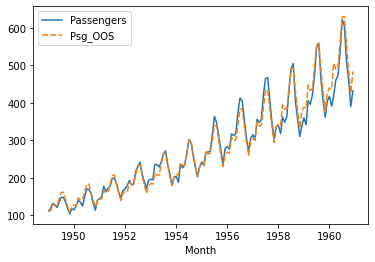

In [10]:
dfplot = df.filter(['Passengers', 'Psg_OOS'])
sns.lineplot(data=dfplot)

Calculate the errors for the in-sample part and the out-of-sample part separately.

Calculating the means for the out of the sample part

creating dfX from students file 4 to calculate the errors

In [19]:
df2 = pd.get_dummies(df, columns=['MonthNum'], drop_first=True, prefix='M')
import statsmodels.api as sm
dfX = df2.filter(regex = "M_|Trend")
dfX = sm.add_constant(dfX)
dfX

c:\Users\wh\anaconda3_python\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Trend,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10,M_11,M_12
Month,,,,,,,,,,,,,
1949-01-01,1.0,1,0,0,0,0,0,0,0,0,0,0,0
1949-02-01,1.0,2,1,0,0,0,0,0,0,0,0,0,0
1949-03-01,1.0,3,0,1,0,0,0,0,0,0,0,0,0
1949-04-01,1.0,4,0,0,1,0,0,0,0,0,0,0,0
1949-05-01,1.0,5,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,1.0,140,0,0,0,0,0,0,1,0,0,0,0
1960-09-01,1.0,141,0,0,0,0,0,0,0,1,0,0,0
1960-10-01,1.0,142,0,0,0,0,0,0,0,0,1,0,0


Mean error (out of the sample)

In [20]:
mean_error = np.mean(df.LogPassengers - results.predict(dfX))
print(mean_error)

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'MonthNum' is not defined
    LogPassengers ~ Trend + C(MonthNum)
                            ^^^^^^^^^^^